In [12]:
import pandas as pd
import numpy as np
import pylab as pl
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

In [13]:
# Read Metadata
meta_df = pd.read_csv('/Users/brensikeg/Desktop/Final/archive/fer2013/fer2013.csv')

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

meta_df = meta_df.rename(columns={"emotion":"label","pixels":"image"})
meta_df['emotion'] = meta_df['label'].apply(lambda x: emotions[int(x)])
meta_df = meta_df.drop(columns=['Usage'])

In [14]:
meta_df["new_image"] = meta_df["image"].apply(lambda x: np.asarray(np.reshape(np.array(x.split(' ')).astype(int),(48,48))))
meta_df["svm"] = meta_df["image"].apply(lambda x: np.asarray(np.reshape(np.array(x.split(' ')).astype(int),(1,2304))))
meta_df = meta_df.drop(columns=['image'])

In [15]:
meta_df

,label,emotion,new_image,svm
0,0,Angry,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ...","[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,0,Angry,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,...","[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,2,Fear,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,...","[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,4,Sad,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ...","[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,6,Neutral,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2...","[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."
...,...,...,...,...
35882,6,Neutral,"[[50, 36, 17, 22, 23, 29, 33, 39, 34, 37, 37, ...","[[50, 36, 17, 22, 23, 29, 33, 39, 34, 37, 37, ..."
35883,3,Happy,"[[178, 174, 172, 173, 181, 188, 191, 194, 196,...","[[178, 174, 172, 173, 181, 188, 191, 194, 196,..."
35884,0,Angry,"[[17, 17, 16, 23, 28, 22, 19, 17, 25, 26, 20, ...","[[17, 17, 16, 23, 28, 22, 19, 17, 25, 26, 20, ..."
35885,3,Happy,"[[30, 28, 28, 29, 31, 30, 42, 68, 79, 81, 77, ...","[[30, 28, 28, 29, 31, 30, 42, 68, 79, 81, 77, ..."


Happy


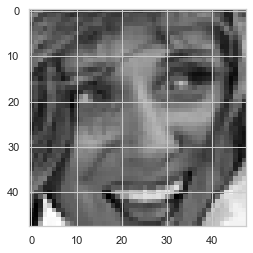

In [50]:
# Check data
id = 32
plt.imshow(meta_df["new_image"][id],cmap=plt.cm.gray)
print(meta_df.emotion[id])

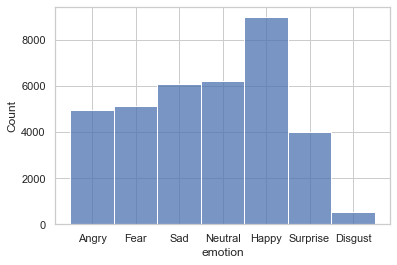

In [17]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.histplot(x="emotion", data=meta_df)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.asarray(meta_df["svm"]), np.asarray(meta_df["label"]), test_size=0.20, random_state=42)

In [34]:
X_train = np.concatenate(X_train, axis=0)
X_test = np.concatenate(X_test, axis=0)

In [35]:
n_components = 30
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

In [36]:
eigenfaces = pca.components_.reshape((n_components, 48, 48))

In [37]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [38]:
clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(X_train_pca, y_train)

In [39]:
print("Predicting emotions on the testing set")
y_pred = clf.predict(X_test_pca)

Predicting the people names on the testing set


In [40]:
print(classification_report(y_test, y_pred, target_names=emotions))

              precision    recall  f1-score   support

       Angry       0.30      0.30      0.30       985
     Disgust       0.20      0.62      0.30       102
        Fear       0.36      0.27      0.31      1043
       Happy       0.55      0.53      0.54      1765
         Sad       0.33      0.34      0.34      1210
    Surprise       0.53      0.60      0.57       795
     Neutral       0.40      0.39      0.40      1278

    accuracy                           0.41      7178
   macro avg       0.38      0.44      0.39      7178
weighted avg       0.42      0.41      0.41      7178



In [41]:
print(confusion_matrix(y_test, y_pred, labels=range(len(emotions))))

[[295  34  87 154 186  76 153]
 [  9  63   5   4   8   5   8]
 [124  44 284 146 176 138 131]
 [165  71 111 935 211  88 184]
 [185  48 132 163 414  47 221]
 [ 51  20  63  90  46 477  48]
 [148  37 101 216 212  61 503]]


In [42]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.41390359431596546


In [43]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

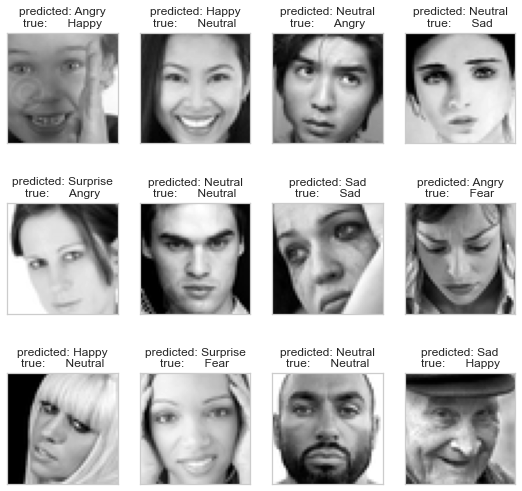

In [49]:
prediction_titles = [title(y_pred, y_test, emotions, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, 48, 48)

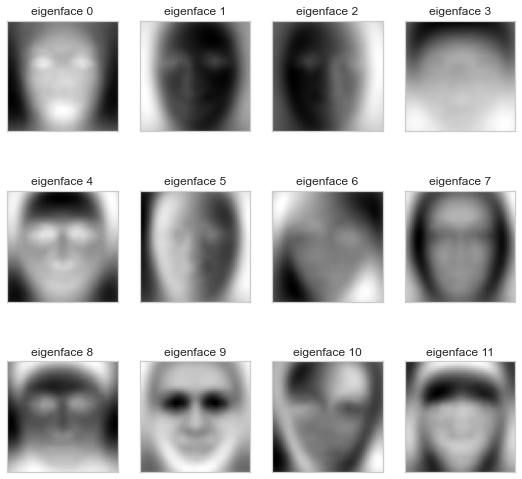

In [47]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 48, 48)
plt.show()

In [48]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.41390359431596546


In [ ]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


In [ ]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)